In [6]:
######################################################################
#이미지 전처리
#######################################################################
img_path = './dataset/forw-samples/88.jpg'
# 이미지를 4D 텐서로 변경
from tensorflow.keras.preprocessing import image
import os
import numpy as np


img = image.load_img(img_path, target_size =(150, 150))
print(img )
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # 모델이 훈련될 때 입력에 적용한 전처리 방식을 동일하게 사용합니다
print(img_tensor.shape)  # 이미지 텐서의 크기는 (1, 150, 150, 3)입니다

<PIL.Image.Image image mode=RGB size=150x150 at 0x12F09BBA760>
(150, 150, 3)
(1, 150, 150, 3)


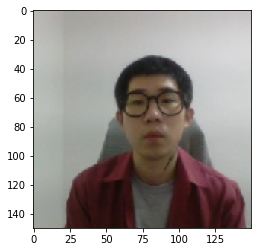

[[0.99999774]]
거북목


In [7]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

#######################################################################
  
from tensorflow.keras.models import load_model    #학습된 모델 로드
model = load_model("tn_model.h5")

result = model.predict( img_tensor ) 
print(result)

if result > 0.5 :
    print("거북목")
else :
    print("정자세")